# Exploratory Data Analysis - Users dataset

------------------
![GitHub](https://img.shields.io/github/license/nicolastolosa/AirBnbModel)

**Author:** Nicolás Tolosa (github: <a href="https://github.com/nicolastolosa" target="_blank">***nicolastolosa***</a>)

**Achievements:** **(1)** Analysis of the missing values of the dataset, as well as the correlation between the missing values of the different columns. **(2)** Univariate analysis for both categorical and numerical variables **(3)** Analysis of the relationships between the attributes and the target variable. **(4)** Calculation of the Predictive Power Score (PPS) matrix to analyse the relationships between the different variables.

-------------
### Introduction <a class="tocSkip"> </a>
In this notebook, the exploratory data analysis for `users` dataset has been performed. The objective of the analysis is to analyse in depth de structure of each of the attributes, discover some of the relationships between the attributes, and analyse their distributions and missing values in order to prevent the possible problems that could appear later in the modeling steps


### Summary of the analysis <a class="tocSkip"> </a> 

1. There are 3 attributes in the dataset that contain Null Values: `date_first_booking` (61%), `age`(44%) and `first_affiliate_tracked` (0,4%).


2. Missing values in `age` column, are **highly correlated** to value *unknown* in `gender` column.


3. The distribution of the variable `age` shows that it contains several **outliers** (values higher than 1.000 years and some values above 100 years). It has been decided that **all the ages above 104 and below 18 years will be considered as missing values.**


4. The distribution of the categorical variables confirms that **the target value `country_destination` is highly inbalanced**. About 90% of the dataset is contained in the two main classes (NDF and US).


5. The variable **`age`** has shown to be **interesting for the prediction of `country_destination`** as there are some differences on the average age of the users for each country.


6. Due to the fact that the target variable is inbalanced, and that some of the categorical attributes contain many categories, there are some cases where some countries are not represented for a particular category (for example there are no instances where `country_destination  = PT` and `signup_method = google` 


7. The matrix of Predictive Power Score has shown some interesting relationships between the variables.


### Important notes!  <a class="tocSkip"> </a>
**The data necessary to run this notebook, has not been included in the repository due to license limitations. Before running this notebook, make sure to run the code in ``AirBnbModel/notebooks/01_download_data/notebook.ipynb`` to download the data into ``AirBnbModel/notebooks/exploration_data/``**

<div class="alert alert-block alert-warning">
<b>Warning:</b> For the data of this project to be accessible, the terms and conditions of the Kaggle competition must be accepted first. Details can be found in the following page: <a href="https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data"> Airbnb New User Bookings | Kaggle </a>
    
</div>

----------

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Libraries" data-toc-modified-id="1.-Libraries-1">1. Libraries</a></span></li><li><span><a href="#2.-Load-data" data-toc-modified-id="2.-Load-data-2">2. Load data</a></span></li><li><span><a href="#3.-Univariate-Analysis" data-toc-modified-id="3.-Univariate-Analysis-3">3. Univariate Analysis</a></span><ul class="toc-item"><li><span><a href="#3.1-Null-/-Unknown-values" data-toc-modified-id="3.1-Null-/-Unknown-values-3.1">3.1 Null / Unknown values</a></span></li><li><span><a href="#3.2-Distribution-of-numerical-variables" data-toc-modified-id="3.2-Distribution-of-numerical-variables-3.2">3.2 Distribution of numerical variables</a></span></li><li><span><a href="#3.3-Distribution-of-categorical-variables" data-toc-modified-id="3.3-Distribution-of-categorical-variables-3.3">3.3 Distribution of categorical variables</a></span></li></ul></li><li><span><a href="#4.-Multivariate-Analysis" data-toc-modified-id="4.-Multivariate-Analysis-4">4. Multivariate Analysis</a></span><ul class="toc-item"><li><span><a href="#4.1-Relationship-with-Target-value" data-toc-modified-id="4.1-Relationship-with-Target-value-4.1">4.1 Relationship with <code>Target</code> value</a></span></li><li><span><a href="#4.2-Predictive-power-score-(PPS)" data-toc-modified-id="4.2-Predictive-power-score-(PPS)-4.2">4.2 Predictive power score (PPS)</a></span></li></ul></li></ul></div>

In [1]:
%load_ext watermark
%watermark

Last updated: 2021-09-29T18:39:02.409362+02:00

Python implementation: CPython
Python version       : 3.9.5
IPython version      : 7.21.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
CPU cores   : 4
Architecture: 64bit



## 1. Libraries
------------------

In [2]:
# Set /notebooks dir to path to import modules
import sys, os, warnings
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

In [3]:
# Import libraries
# ----------------

# data manipulation
import pandas as pd
import numpy as np
import missingno as msno 

# Statistics
import ppscore as pps

# # Visualization
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import seaborn as sns

from modules.plots import column_autolabel

plt.style.use('ggplot')
sns.set(style='whitegrid')

pd.set_option("display.precision", 2)

In [4]:
# Path of the source data
ROOT_PATH = '../exploration_data/02_train'

## 2. Load data
------------------

First, ``users`` dataset is loaded and its columns datatypes are transformed based on has been seen in `01_first_exploration`.

In [5]:
# Loading users data
path = os.path.join(ROOT_PATH, 'users.csv')
users_raw = pd.read_csv(path, index_col='id')

users = (
    users_raw
    .astype({'date_account_created': 'datetime64', 'date_first_booking': 'datetime64'})
    .assign(timestamp_first_active=lambda _df: pd.to_datetime(_df.timestamp_first_active, format='%Y%m%d%H%M%S'))
    .astype({
        'gender': 'category',
        'signup_method': 'category',
        'signup_flow': 'category',
        'language': 'category',
        'affiliate_channel': 'category',
        'affiliate_provider': 'category',
        'first_affiliate_tracked': 'category',
        'signup_app': 'category',
        'first_device_type': 'category',
        'first_browser': 'category',
        'country_destination': 'category'
    })
)
    
users_raw.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other
yo8nz8bqcq,2014-01-01,20140101001558,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
4grx6yxeby,2014-01-01,20140101001639,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF
c8mfesvkv0,2014-01-01,20140101002626,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,NDF
xwxei6hdk4,2014-01-01,20140101002742,2014-01-07,FEMALE,32.0,facebook,0,en,seo,google,linked,Web,iPad,Mobile Safari,US


## 3. Univariate Analysis
-----------------





### 3.1 Null / Unknown values


The columns containing null values are shown in the table below

In [6]:
(
    pd.concat([users.isna().sum(), 100 * users.isna().sum() / users.shape[0]] ,axis = 1)
    .rename(columns = {0: 'Total', 1:'% Total'})
    .rename_axis(columns = 'Null Values', index = 'Columns')
)


Null Values,Total,% Total
Columns,,
date_account_created,0,0.00
timestamp_first_active,0,0.00
date_first_booking,36033,61.02
gender,0,0.00
age,25698,43.52
signup_method,0,0.00
signup_flow,0,0.00
language,0,0.00
affiliate_channel,0,0.00


#### 3.1.1 *`date_first_booking` = Null*

A random subset of the data where `date_first_booking` is null is shown below.
 - As expected, **`date_first_booking` is null when there is no reservation**

In [7]:
(
    users
    [users.date_first_booking.isna()]
    .sample(10, random_state = 1)
)

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
69q6dxccoc,2014-04-27,2014-04-27 15:48:35,NaT,-unknown-,43.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
et386rxl8o,2014-03-06,2014-03-06 16:36:50,NaT,MALE,24.0,facebook,12,en,api,other,untracked,iOS,Mac Desktop,Chrome,NDF
kj5y15ndu0,2014-01-01,2014-01-01 23:55:31,NaT,FEMALE,36.0,facebook,0,en,seo,google,linked,Web,iPad,Mobile Safari,NDF
t3chn8j0cl,2014-03-14,2014-03-14 02:15:25,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,NDF
t4oh2m4cl8,2014-03-27,2014-03-27 05:09:51,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,NDF
3si5c7dhw5,2014-01-22,2014-01-22 01:09:07,NaT,FEMALE,69.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Safari,NDF
v271rivbjl,2014-04-02,2014-04-02 17:36:29,NaT,-unknown-,NaN,basic,0,en,seo,facebook,untracked,Web,Mac Desktop,Safari,NDF
mp5qb8xyz2,2014-01-16,2014-01-16 19:46:31,NaT,FEMALE,46.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,NDF
swrako6y83,2014-06-11,2014-06-11 07:07:45,NaT,-unknown-,31.0,facebook,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF


In [8]:
(
    users
    .date_first_booking
    .isna()
    .groupby(users.country_destination)
    .sum()
)

country_destination
AU           0
CA           0
DE           0
ES           0
FR           0
GB           0
IT           0
NDF      36033
NL           0
PT           0
US           0
other        0
Name: date_first_booking, dtype: int64

#### 3.1.2 *`age` = Null*

A random subset of the data where `age` is null is shown below.
 - `age = NaN` might be a good predictor for users with no reservation.

In [9]:
(
    users
    [users.age.isna()]
    .sample(10, random_state = 10)
)

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
orvxact0su,2014-02-09,2014-02-09 01:22:43,NaT,-unknown-,NaN,basic,23,en,direct,direct,untracked,Android,Other/Unknown,-unknown-,NDF
dwl56huv5m,2014-02-14,2014-02-14 00:54:01,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,NDF
hnj29m7chc,2014-04-14,2014-04-14 17:17:34,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
hmemv026xu,2014-06-03,2014-06-03 06:08:28,NaT,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF
3o8qa9td7n,2014-05-05,2014-05-05 03:26:15,2014-05-05,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
8rkoa7m5ue,2014-03-24,2014-03-24 19:23:07,NaT,-unknown-,NaN,basic,0,ko,direct,direct,untracked,Web,Mac Desktop,Safari,NDF
zep9mglwr6,2014-04-03,2014-04-03 20:02:37,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF
ua4lq8awj3,2014-02-05,2014-02-05 04:32:30,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,AOL Explorer,NDF
dx9g7x25q7,2014-03-30,2014-03-30 23:48:43,NaT,-unknown-,NaN,basic,0,en,content,google,omg,Web,Mac Desktop,Firefox,NDF


#### 3.1.3 *`first_affiliate_tracked` = Null*

A random subset of the data where `first_affiliate_tracked` is null is shown below.

In [10]:
(
    users
    [users.first_affiliate_tracked.isna()]
    .sample(10, random_state = 10)
)

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
b8rhz15poc,2014-03-14,2014-03-14 05:57:22,NaT,-unknown-,NaN,basic,25,ko,direct,direct,NaN,iOS,Other/Unknown,-unknown-,NDF
hacoiaf2wy,2014-02-08,2014-02-08 17:09:36,NaT,MALE,34.0,facebook,12,en,api,other,NaN,iOS,Other/Unknown,-unknown-,NDF
nwdx03kjix,2014-02-24,2014-02-24 05:06:35,NaT,-unknown-,NaN,basic,25,en,direct,direct,NaN,iOS,Other/Unknown,-unknown-,NDF
dntmmjtugf,2014-03-05,2014-03-05 00:17:27,NaT,FEMALE,46.0,facebook,12,en,api,other,NaN,iOS,Other/Unknown,-unknown-,NDF
70diu7u2sq,2014-01-11,2014-01-11 19:10:39,NaT,MALE,43.0,facebook,12,en,api,other,NaN,iOS,Other/Unknown,-unknown-,NDF
w5sn4qqiav,2014-02-15,2014-02-15 22:56:41,NaT,-unknown-,NaN,basic,24,en,direct,direct,NaN,Moweb,Other/Unknown,-unknown-,NDF
z7va6je0im,2014-01-13,2014-01-13 07:40:07,NaT,-unknown-,NaN,basic,25,en,direct,direct,NaN,iOS,Other/Unknown,-unknown-,NDF
qurqbegkcq,2014-01-16,2014-01-16 21:26:56,NaT,-unknown-,NaN,basic,25,en,direct,direct,NaN,iOS,Other/Unknown,-unknown-,NDF
c1qplgehvg,2014-06-01,2014-06-01 14:17:44,NaT,-unknown-,NaN,basic,25,en,direct,direct,NaN,iOS,Other/Unknown,-unknown-,NDF


#### 3.1.4 Correlation matrix for null values of the dataset

Next, the correlation matrix for null values of the dataset is shown. The values of *unknown* and *untracked* in the categorical values have also been included as missing values for this analysis. The following conclusions can be induced:

- As supposed, unknown values for variables `age`and `gender` are highly correlated, so when one is missing, it is highly probable that the other one is missing too.

- Unknown values of the column `first_browser` is highly correlated with missing `first_device_type`, and in a lower level, with the column `first_affiliate_tracked`

Null / Unkwnown Values,Total,pct_Total
Columns,,
gender,30163,51.08
age,25698,43.52
signup_method,0,0.00
signup_flow,0,0.00
language,0,0.00
affiliate_channel,0,0.00
affiliate_provider,0,0.00
first_affiliate_tracked,31442,53.24
signup_app,0,0.00


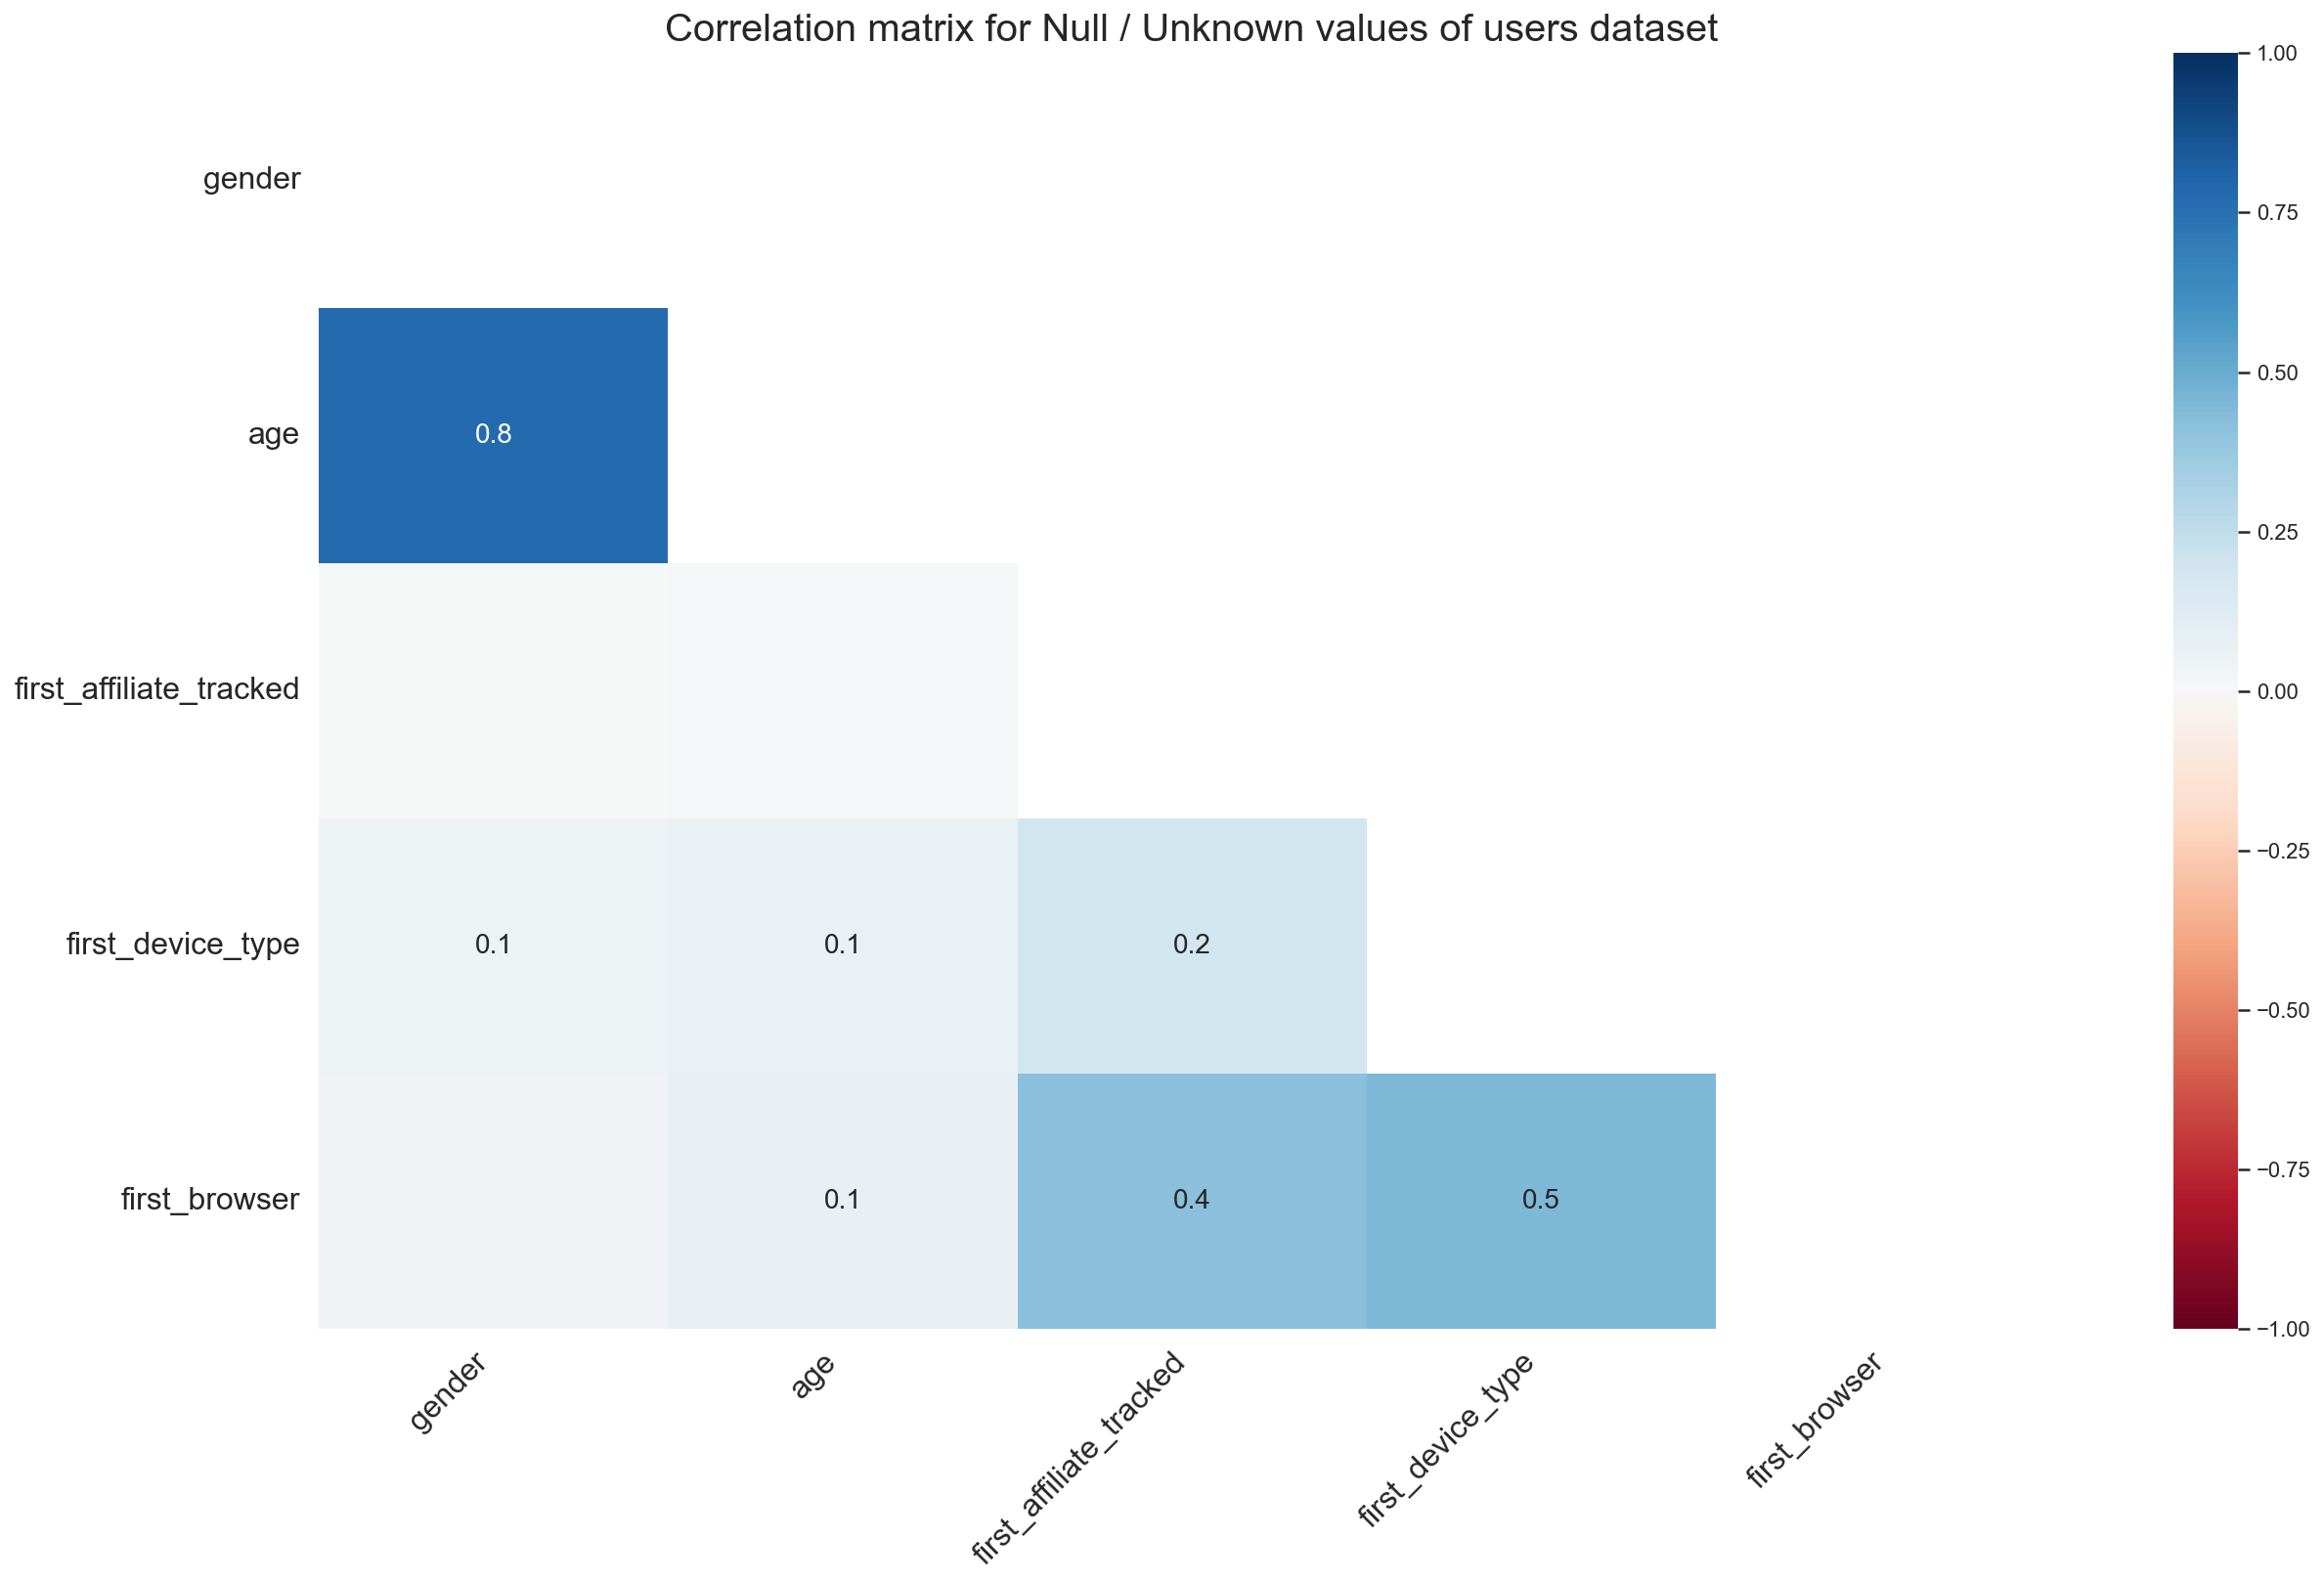

In [11]:
display(
    users
    .replace(['-unknown-', 'Other/Unknown', 'untracked'], np.nan)
    .loc[:, 'gender':]
    .isna()
    .sum()
    .to_frame()
    .rename(columns = {0: 'Total'})
    .assign(pct_Total = lambda df: 100 * df.Total / users.shape[0])
    .rename_axis(columns = 'Null / Unkwnown Values', index = 'Columns')
)

heatmap_data = (
        users
        .replace(['-unknown-', 'Other/Unknown', 'untracked'], np.nan)
        .loc[:, ['gender', 'age', 'first_affiliate_tracked', 'first_device_type', 'first_browser']]
    )

ax = msno.heatmap(heatmap_data, cbar = True)
ax.set_title('Correlation matrix for Null / Unknown values of users dataset', size = 20)
plt.show()

### 3.2 Distribution of numerical variables

The only purely numerical variable of the whole dataset is `age`. In the following cell, a boxplot of `age` variable is shown:

- There are some obvious **outliers** located in the range of age between 1800 and 2014. It is obvious that these values correspond to an **error in the measure**, and thus, they must be discarded.
- There are actually 107 rows whose age is informed as higher than 1000 years.

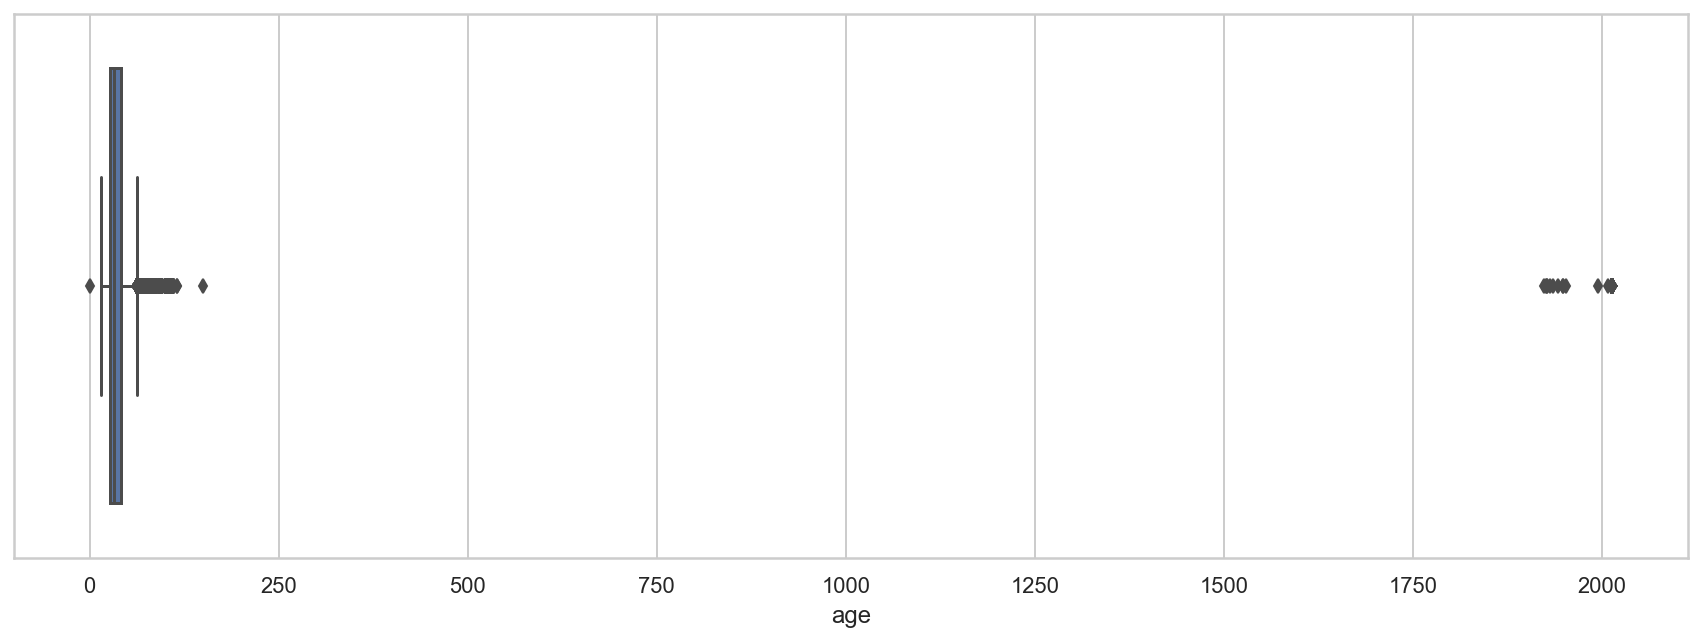

,count,mean,std,min,25%,50%,75%,max
age,33354.0,42.61,112.33,1.0,27.0,32.0,41.0,2014.0


In [12]:
fig = plt.figure(figsize = (15,5))

sns.boxplot( x = 'age', data = users,)
ax.set_title("Distribución de la variable 'age'", fontsize = 15)
plt.show()

users.age.describe().to_frame().T

In [13]:
(users.age > 1000).sum()

107

The following boxplot and histogram show the distribution of the variable age once values higher than 1000 have been removed:

- There are still some pretty high values, some of which are impossible (~150 years, 2 years), and some of which are suspicious (lot of values around 105 years).

- It seems that there might be some errors on the measure, or simply that some of the people didn't inform correctly their age. 

- It is hard to stablish a limit on the valid age to filter outliers. It is obvious that an age of 120 years is not possible, but there could be some users whose age is around 100 years.

- As it can be seen from the histogram, there is a peak in the age of 105 years. This is the maximum age allowed by the platform at the time of registration. It is logic to think that some of the users who don't want to inform about their age would choose the maximum allowed age. Then, **every record with an age >= 105 years will be considered an outlier.**

- About the lower age range, the requisite for registering on AirBnb is to be 18 or older. Then, **every record with an age < 18 years will be also considered as an outlier.**


-------------------


On the other side, watching at the distribution, it can be seen that it is a slightly tailed distribution with an age average of 36 years and a median of 32 years.

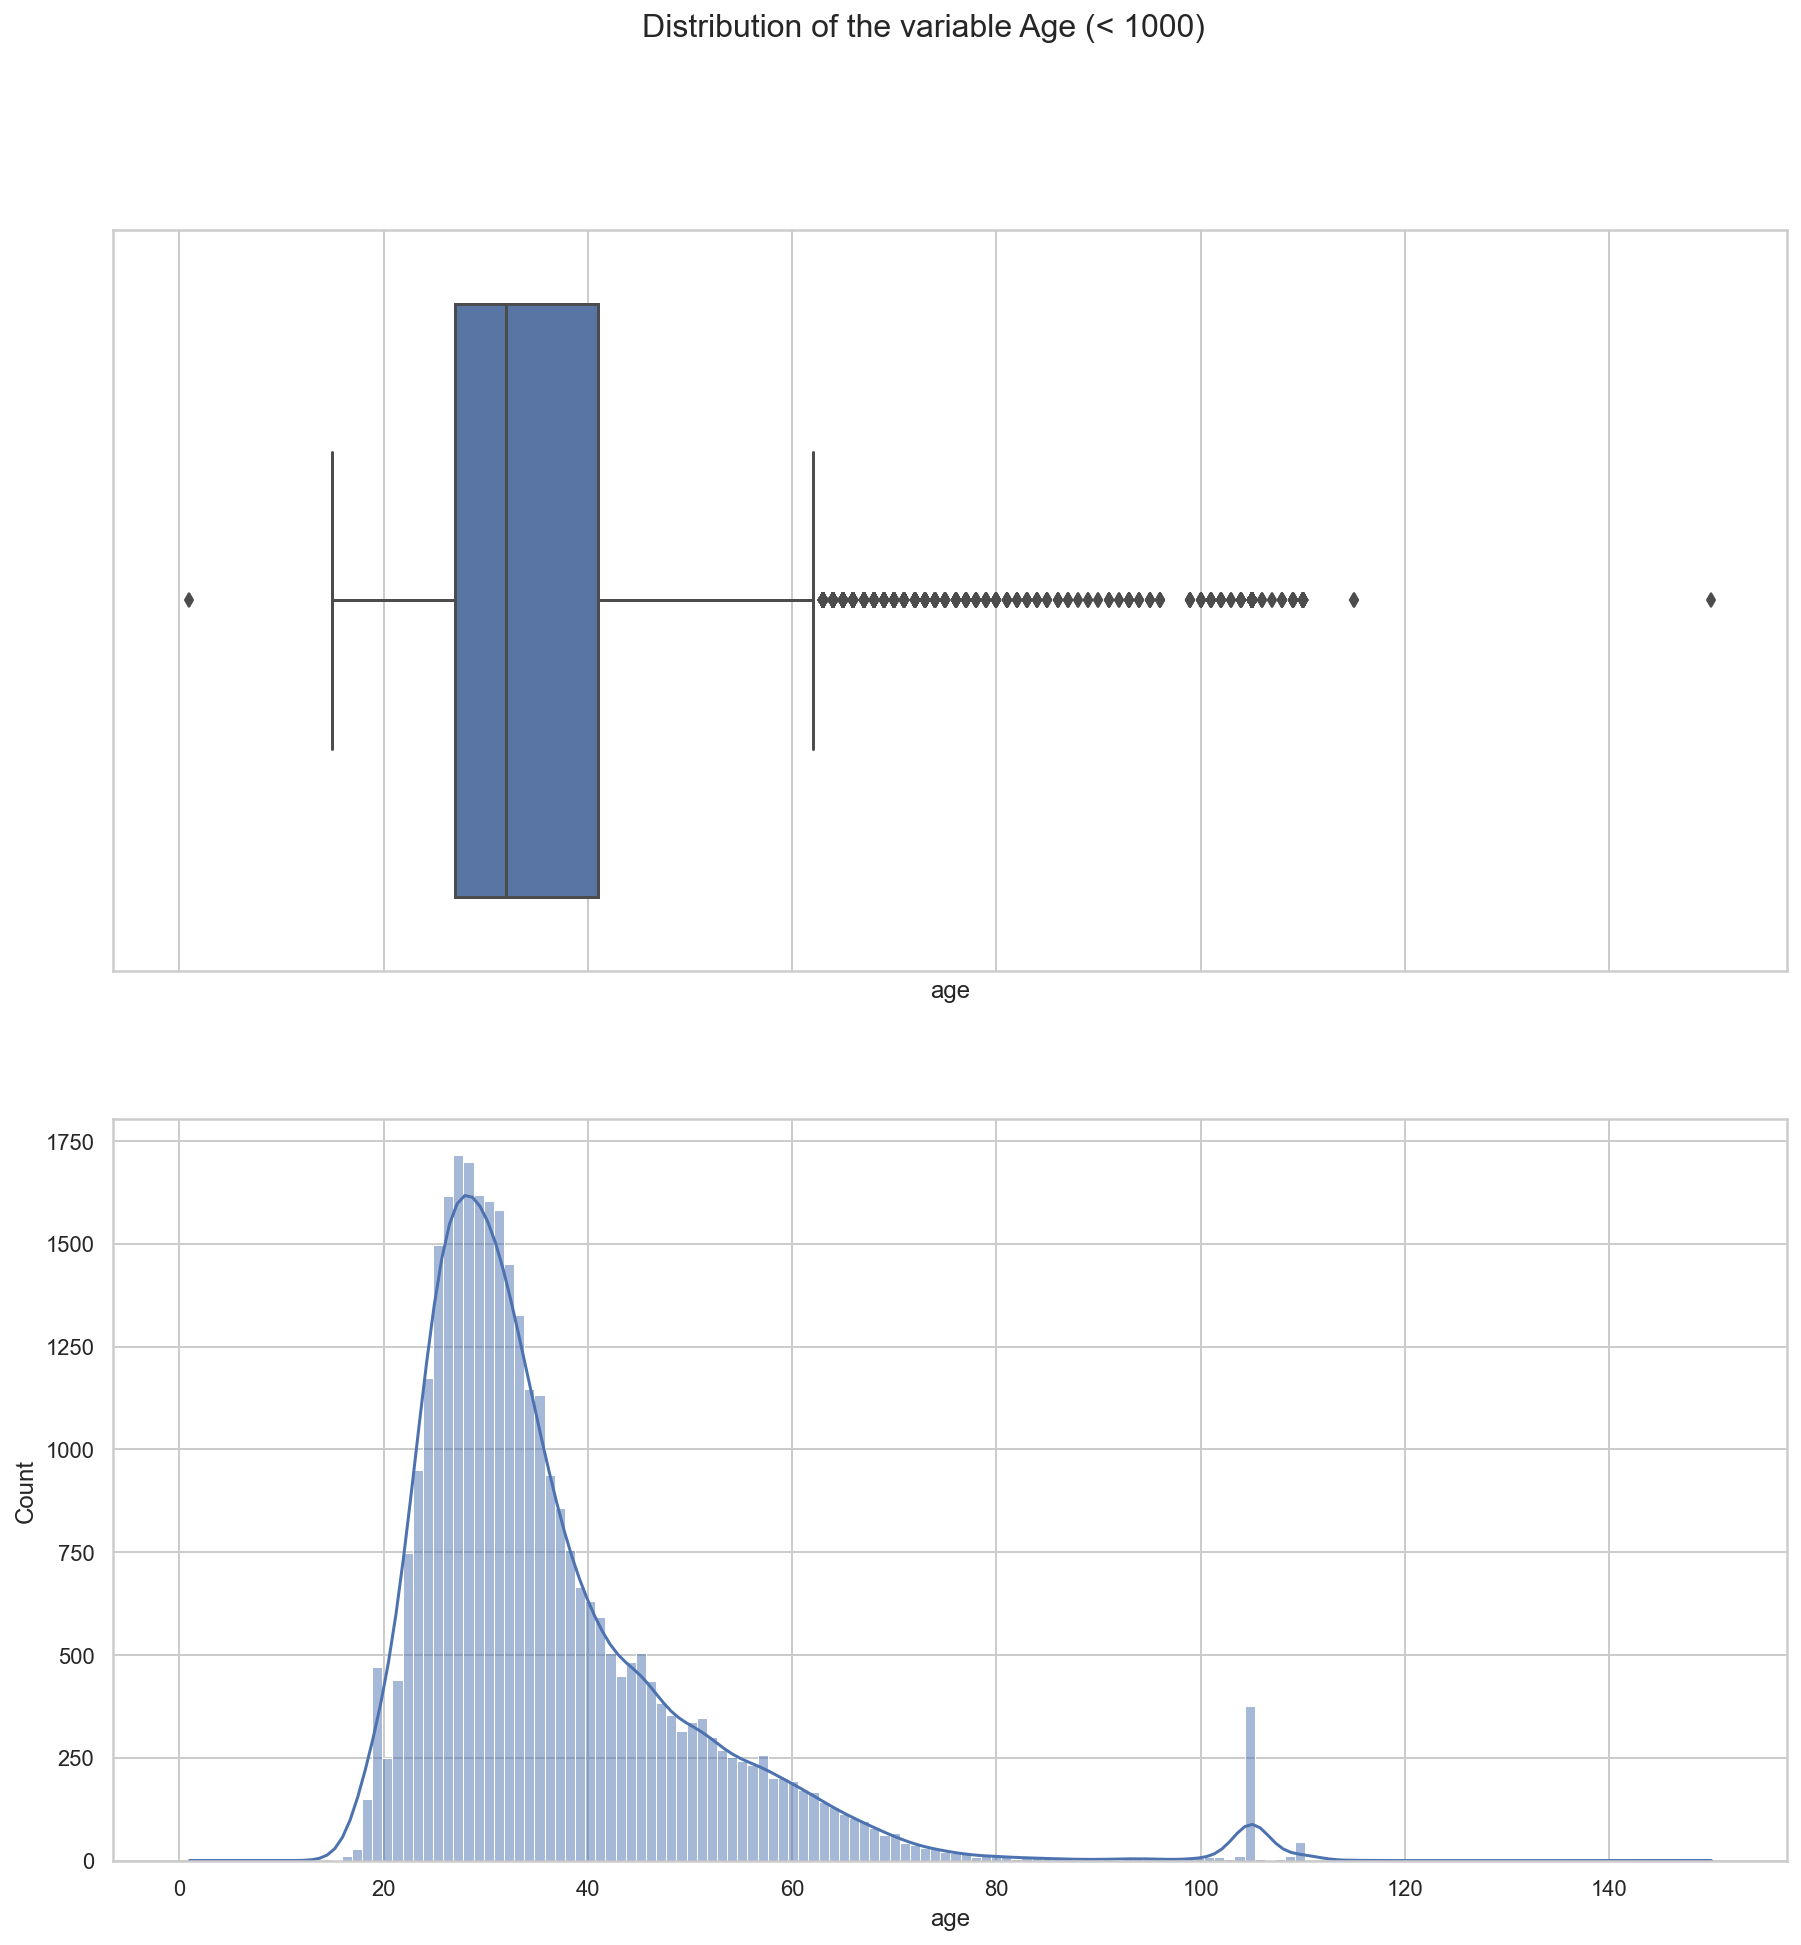

,count,mean,std,min,25%,50%,75%,max
age,33247.0,36.29,14.3,1.0,27.0,32.0,41.0,150.0


In [14]:
fig, ax = plt.subplots(2, 1, figsize = (15, 15), sharex  = True)


ax0 = sns.boxplot(x = 'age', data = users[users.age < 1000], ax = ax[0])
ax1 = sns.histplot(users[users.age < 1000].age.astype(int), bins = 150, kde = True, ax = ax[1])


fig.suptitle('Distribution of the variable Age (< 1000)', fontsize=16)
plt.show()

users[users.age < 1000].age.describe().to_frame().T

The following function is defined to remove ages >= 105 and < 18.

In [15]:
def clean_users_age(users, threshold=[18, 104]):
    return users.assign(age = lambda _df: _df.age.where((_df.age >= 18) & (_df.age <= 104), np.nan))

### 3.3 Distribution of categorical variables

The following bar plots show the distribution of the categorical variables of the dataset, showing the pct of the total values of each category for the training dataset.

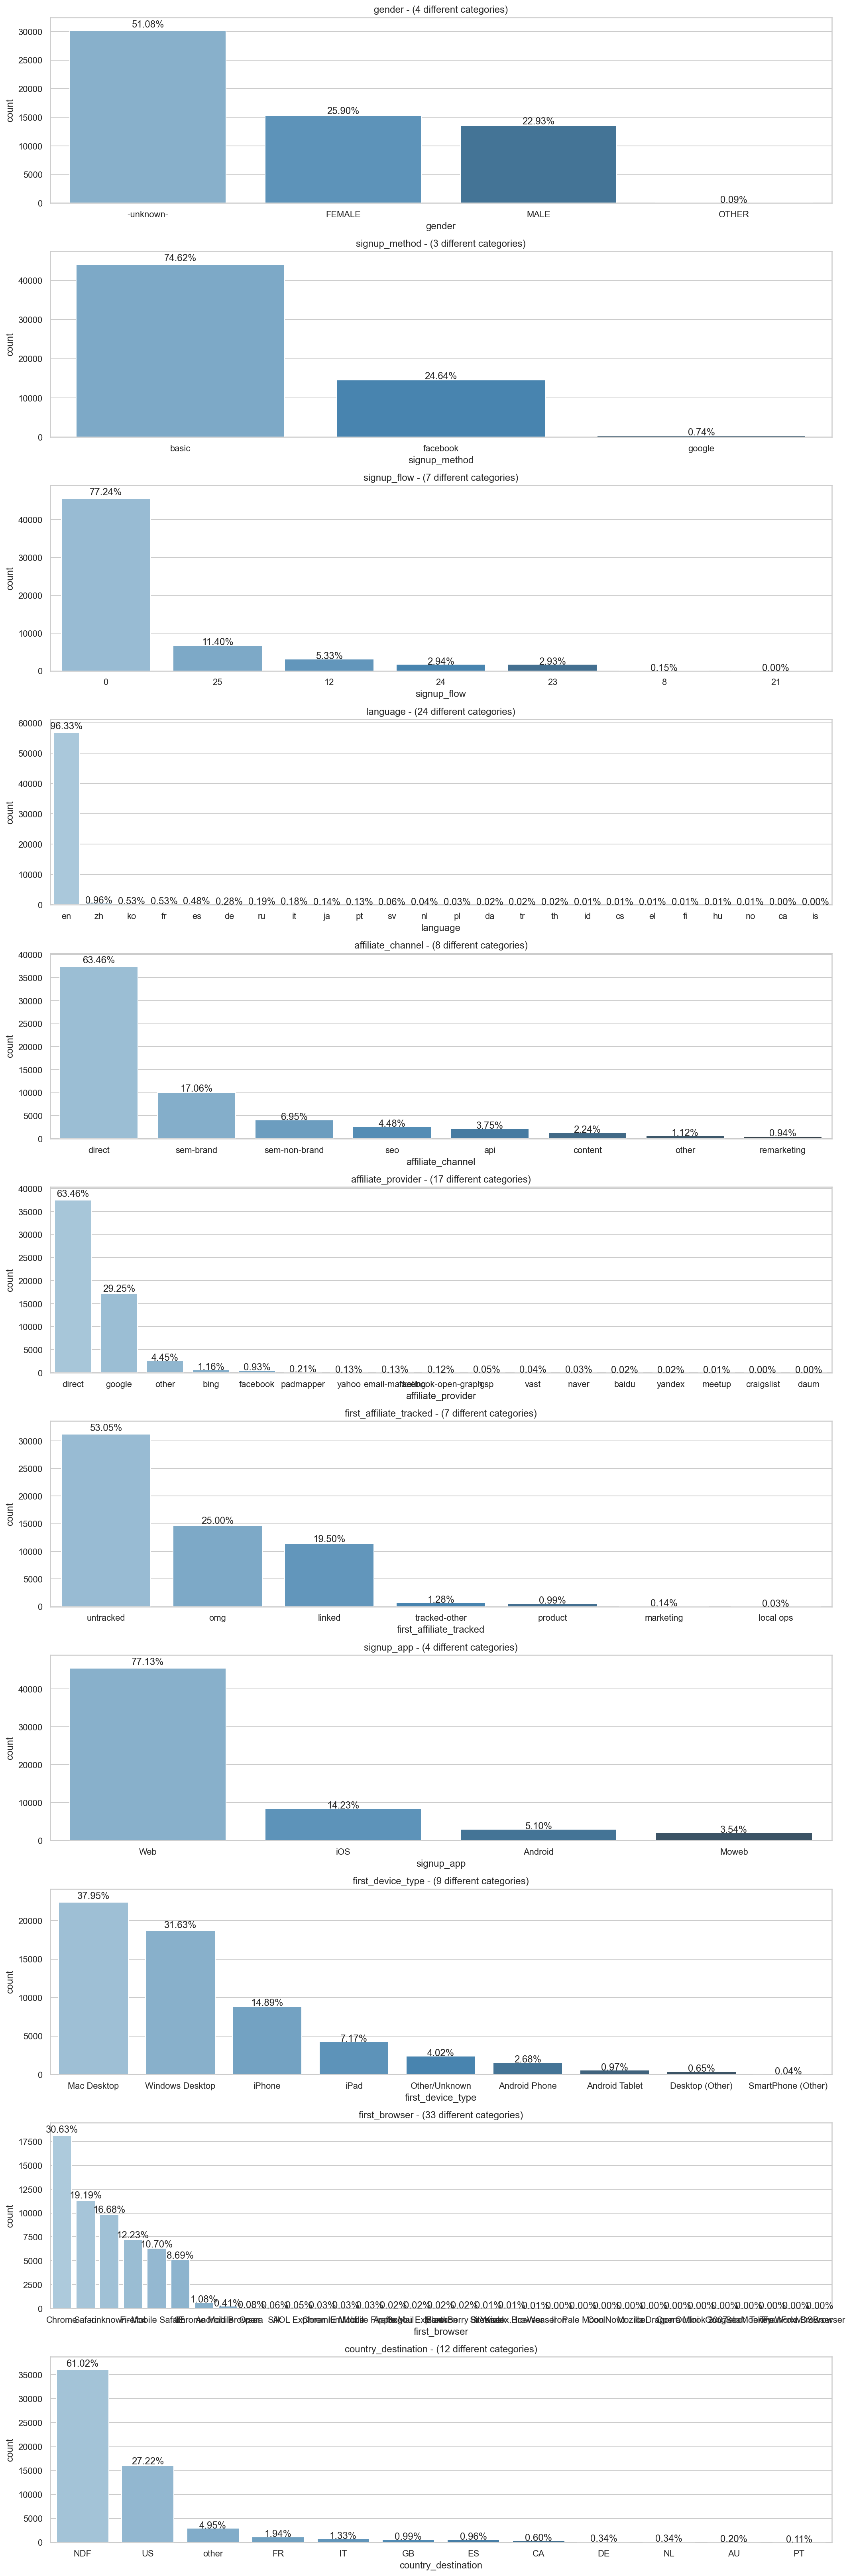

In [16]:
fig, ax = plt.subplots(11, 1, figsize = (15, 45))

for i, column in enumerate(users.select_dtypes('category').columns):
    
        cat_counts = users[column].value_counts().to_frame()
        sns.countplot(data=users, x=column, palette="Blues_d", order=cat_counts.index, ax = ax[i])

        column_autolabel(ax=ax[i], total_ratio=cat_counts.sum().values[0])

        title = f"{column} - ({cat_counts.count().values[0]} different categories)"
        ax[i].set_title(title)

fig.tight_layout()        
plt.show()

## 4. Multivariate Analysis
-----------------


During the multivariate analysis, the relationship between the different variables and the target column will be studied. Also, the relationships between non-targer variables will be analysed using the Predictive Power Score (PPS) 

### 4.1 Relationship with `Target` value

The following plots show the distribution of the different categorical values across the possible values of the target variable `country_destination`

As it has been discovered during the previous analyses, the targed variable is **higly unbalanced**. Then, there are some values of the categorical values that are not represented for all the possible values of `country destination`. This may cause problems in the future.

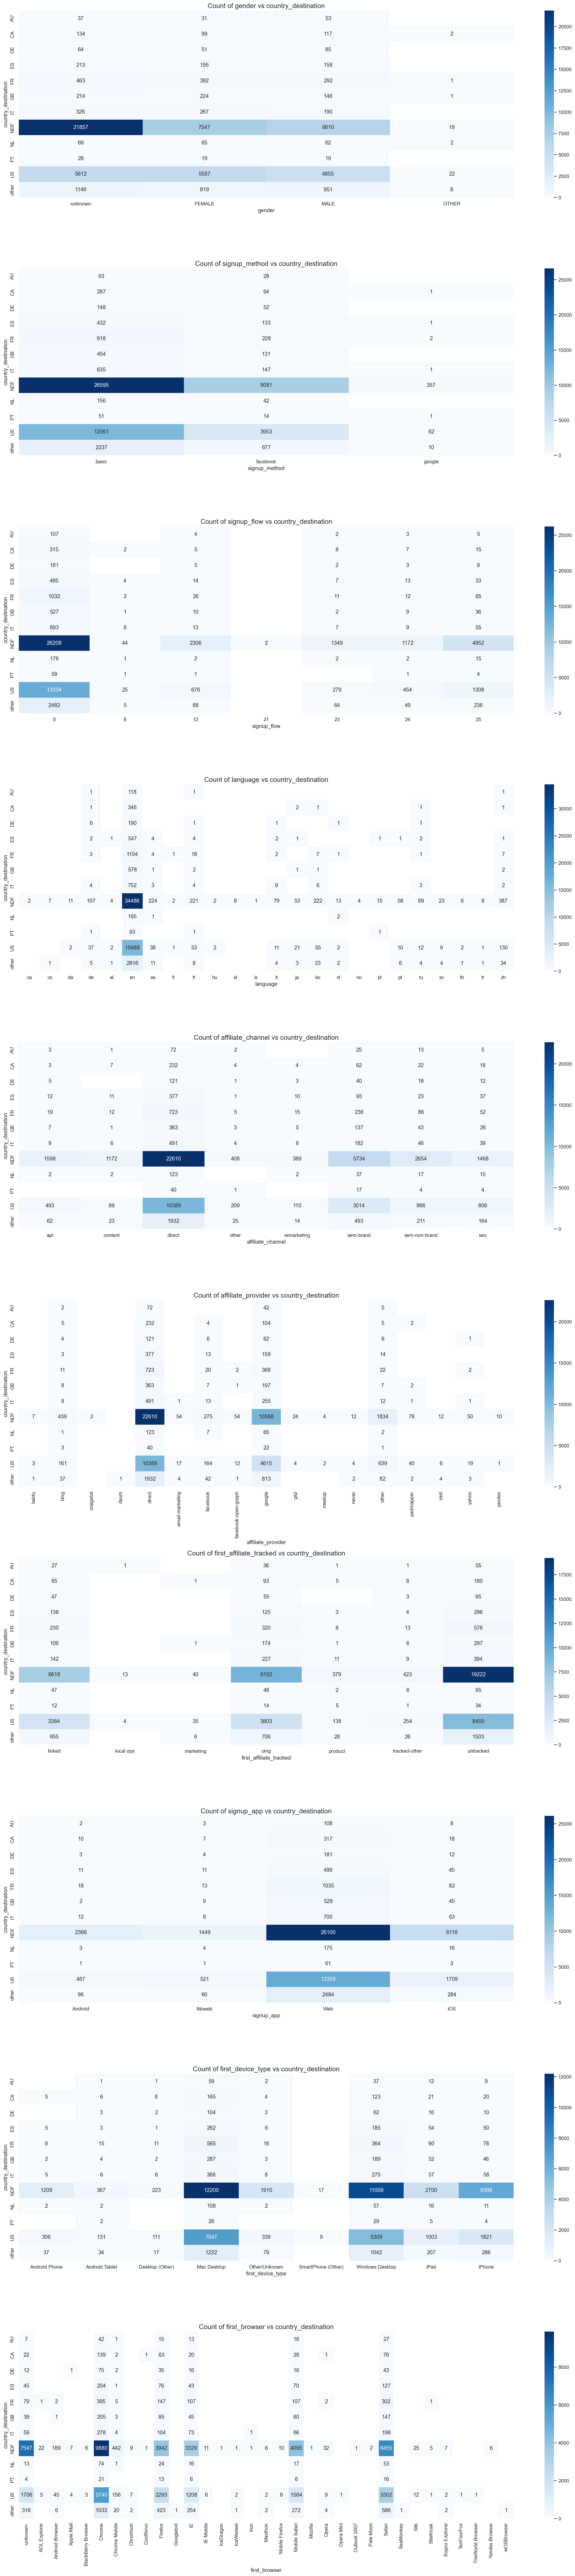

In [17]:
fig, ax = plt.subplots(10, 1, figsize = (20, 80))

columns = (
    users
    .select_dtypes('category')
    .columns
    .drop('country_destination')
)

for i, column in enumerate(columns):
    
        _df = pd.pivot_table(
            users.reset_index(),
            values='id',
            index='country_destination',
            columns=column,
            aggfunc=len
        )
        sns.heatmap(data=_df, annot=True, cmap="Blues", vmin=0, fmt='g', ax = ax[i])

        title = f"Count of {column} vs country_destination"
        ax[i].set_title(title, size = 15)

fig.tight_layout()        
plt.show()

When watching to the numerical values, it looks interesting that there are **significant differences in the average ages** for each of the countries. 

It must be kept in mind that the user database that is being analyzed consists on users of AirBnb only from the US. Then, some explaination to the fact that some countries have older age averages than others can be found in:

- Countries as Australia (older age average) are far away from the US and tend to be more expensive. Then it makes sense that older people can afford that kind of destination better than young people.

- Some destinations such as Spain and Netherlands are known for being a common destination between young people

This could be a useful factor to separate the users of the different destinations.

The standard deviation of all distribution remains relatively constant at about 11-12 years.

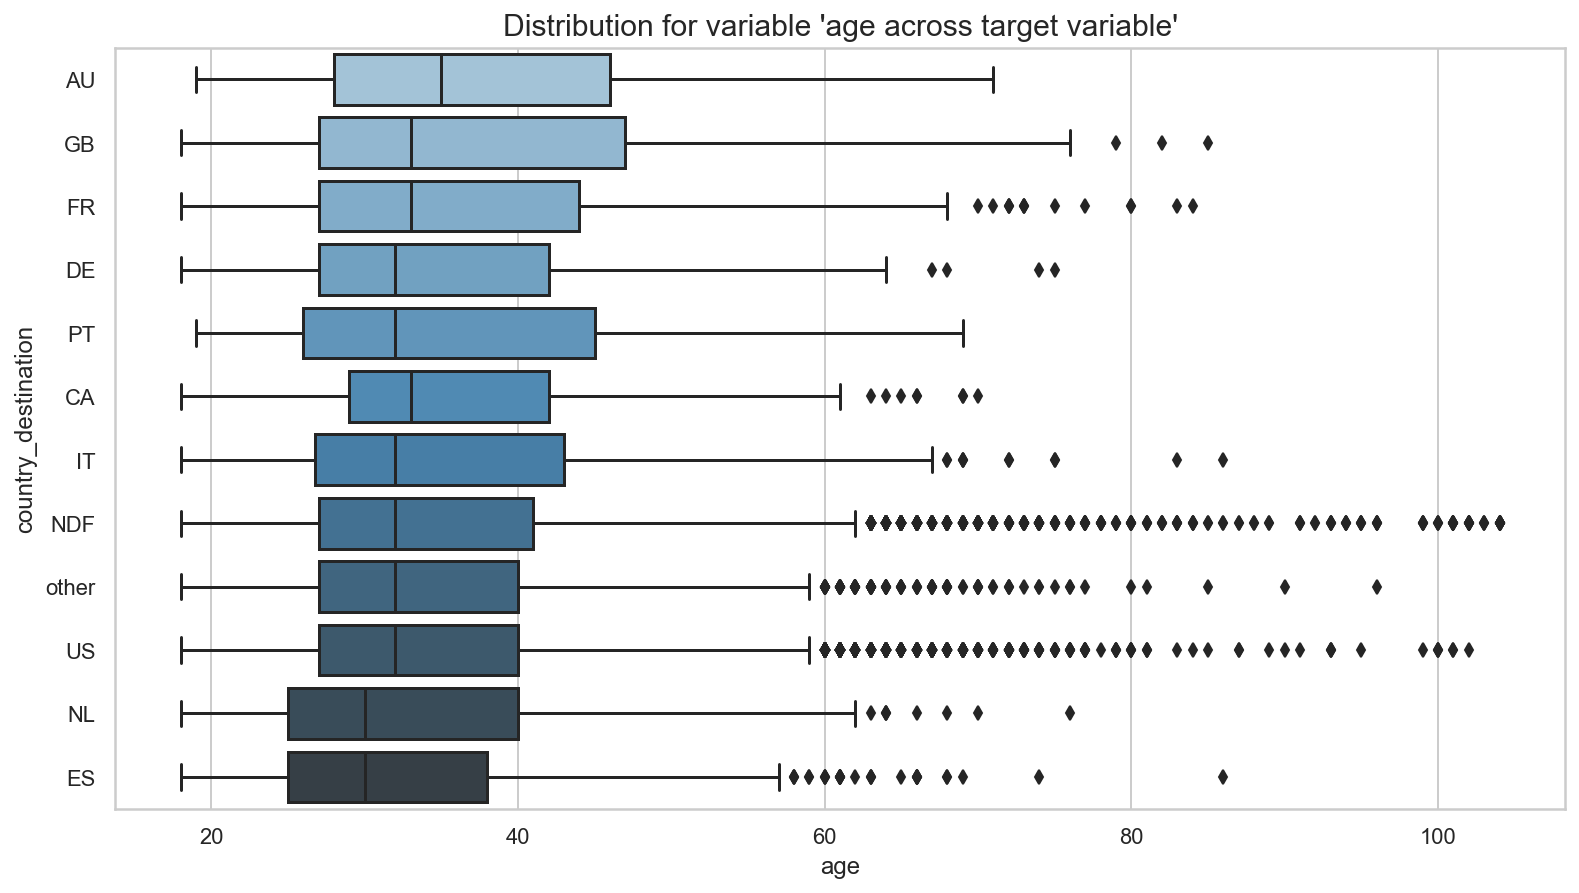

,count,mean,std,min,25%,50%,75%,max
country_destination,,,,,,,,
AU,93.0,37.80,12.29,19.0,28.00,35.0,46.0,71.0
GB,433.0,37.45,13.58,18.0,27.00,33.0,47.0,85.0
FR,826.0,36.79,12.89,18.0,27.00,33.0,44.0,84.0
DE,157.0,36.39,13.11,18.0,27.00,32.0,42.0,75.0
PT,37.0,36.32,13.47,19.0,26.00,32.0,45.0,69.0
CA,270.0,35.96,11.09,18.0,29.00,33.0,42.0,70.0
IT,540.0,35.63,12.58,18.0,26.75,32.0,43.0,86.0
NDF,14925.0,35.60,12.27,18.0,27.00,32.0,41.0,104.0
other,2139.0,35.23,11.36,18.0,27.00,32.0,40.0,96.0


In [18]:
fig = plt.figure(figsize = (13, 7))

_df = (
    users
    .pipe(clean_users_age)
    .groupby('country_destination')
    .age
    .describe()
    .sort_values('mean', ascending = False)
)

ax = sns.boxplot(x = 'age', data = users[(users.age < 105) & (users.age >= 18)], 
                   palette="Blues_d", y = 'country_destination', order = _df.index)
ax.set_title("Distribution for variable 'age across target variable'", fontsize = 15)


plt.show()
display(_df)

### 4.2 Predictive power score (PPS)

The Predictive Power Score (PPS) shows any relationship existing between two variables (not just linear relationship), by comparing the score obtained when trying to predict one variable using another variable with a baseline score.

This method uses decision trees trained and evaluated using Cross validation and gives a sense of the ability of one variable to predict another one (giving a bettwe understanding of thei relationship). This method has the advantages that doesn't only capture linear relationships, that can be calculated for both numerical and categorical variables and that the resulting PPS matrix score is not symetrical (the fact that variable A can accurately predict variable B, doesn't mean that variable B can predict variable A accurately). 

Further information about PPS can be found here: <a href="https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598" target="_blank">**RIP correlation. Introducing the Predictive Power Score**</a>

The following matrix shows the PPS score for all the variables

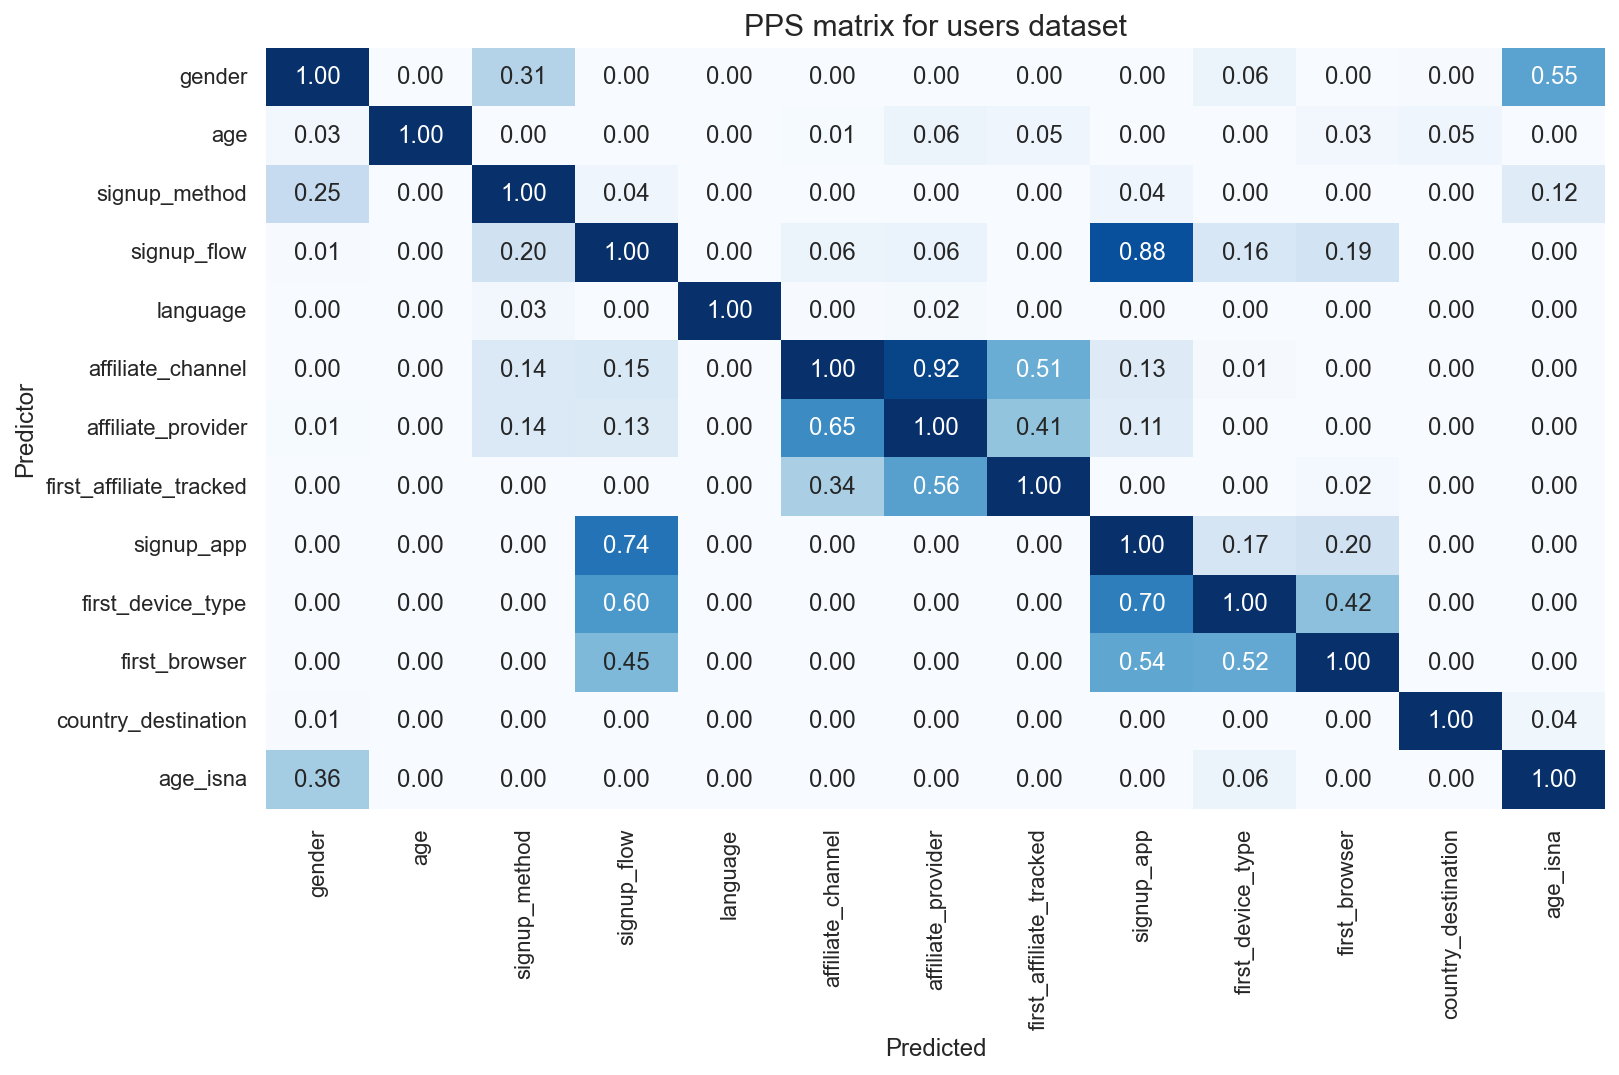

In [19]:
users_pps = (
    users
    .select_dtypes(exclude = ['datetime64'])
    .pipe(clean_users_age)
    .assign(age_isna = lambda df: df.age.isna().astype(int))
)
cols = users_pps.columns

warnings.filterwarnings('ignore')
pps_matrix = pps.matrix(users_pps).pivot_table(values='ppscore', index='x', columns='y')
pps_matrix_sorted = pps_matrix.loc[cols, cols]

fig = plt.figure(figsize = (12,7))
ax = sns.heatmap(pps_matrix_sorted, cmap="Blues", annot=True, fmt='.2f', cbar=False)

ax.set_title("PPS matrix for users dataset", fontsize = 15)
ax.set_xlabel('Predicted')
ax.set_ylabel('Predictor')
plt.show()

Any of the variables predicts (at least by itself), the `target` variable. **The attribute that looks to be more useful for predicting the destination country seems `age`**.


In [20]:
def compare_columns(df, values, index, columns, axis=0):
    return (
        pd.pivot_table(
            df.reset_index(),
            values=values,
            index=index,
            columns=columns,
            aggfunc = len)
        .apply(lambda _col: _col.div(_col.sum(axis=axis), axis=axis) * 100))

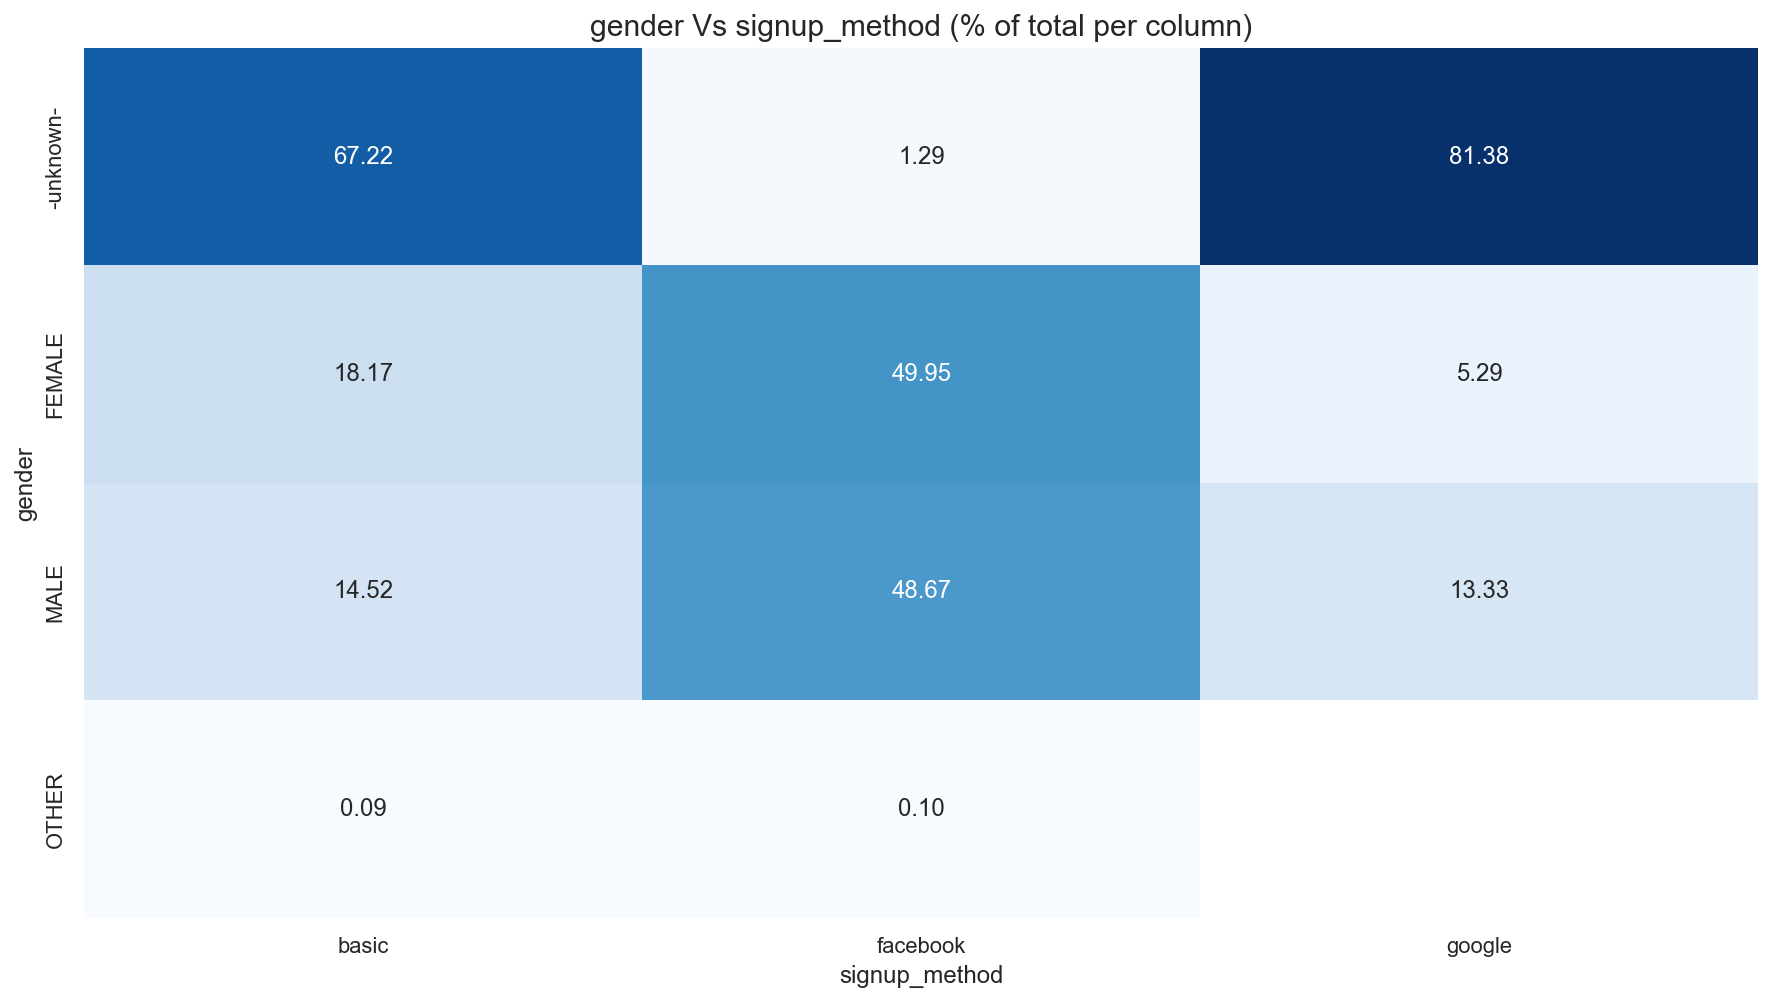

In [21]:
fig = plt.figure(figsize = (15,8))

ax = sns.heatmap(compare_columns(users_pps, 'id', 'gender', 'signup_method'),
                 annot=True, cmap="Blues", fmt='.2f', cbar=False)

ax.set_title('gender Vs signup_method (% of total per column)', size = 15)
plt.show()

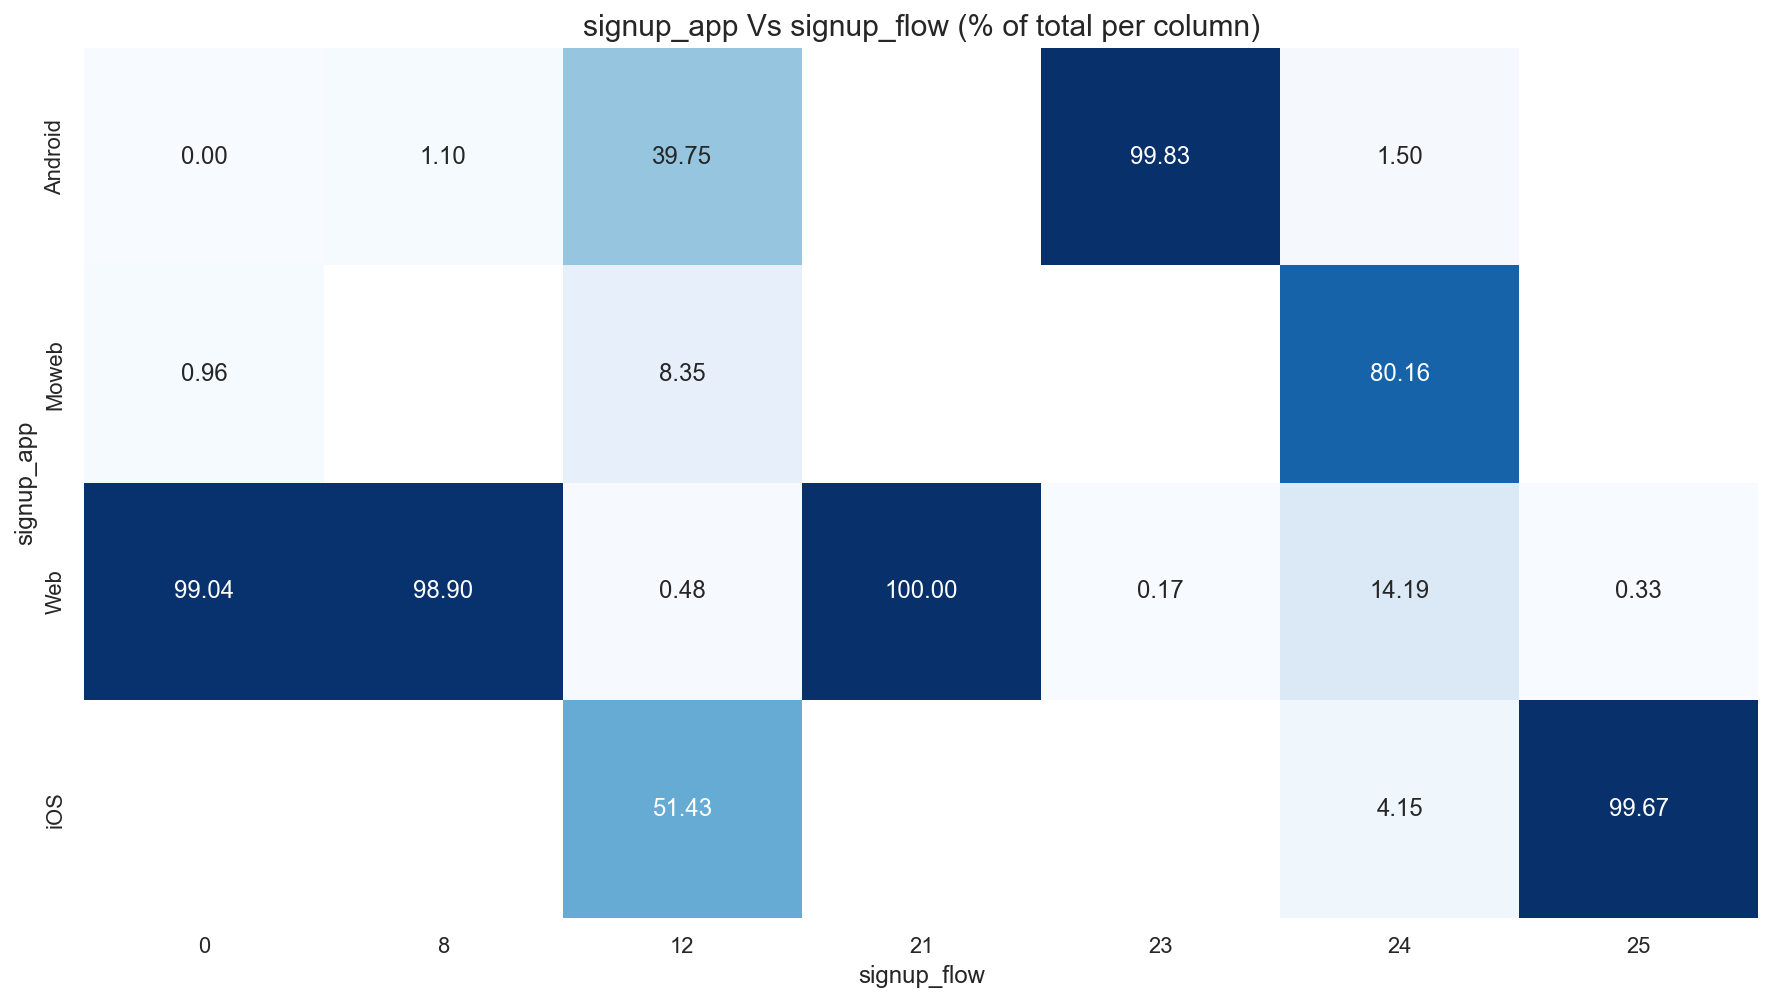

In [22]:
fig = plt.figure(figsize = (15,8))

ax = sns.heatmap(compare_columns(users_pps, 'id', 'signup_app', 'signup_flow'),
                 annot=True, cmap="Blues", fmt='.2f', cbar=False)

ax.set_title('signup_app Vs signup_flow (% of total per column)', size = 15)
plt.show()

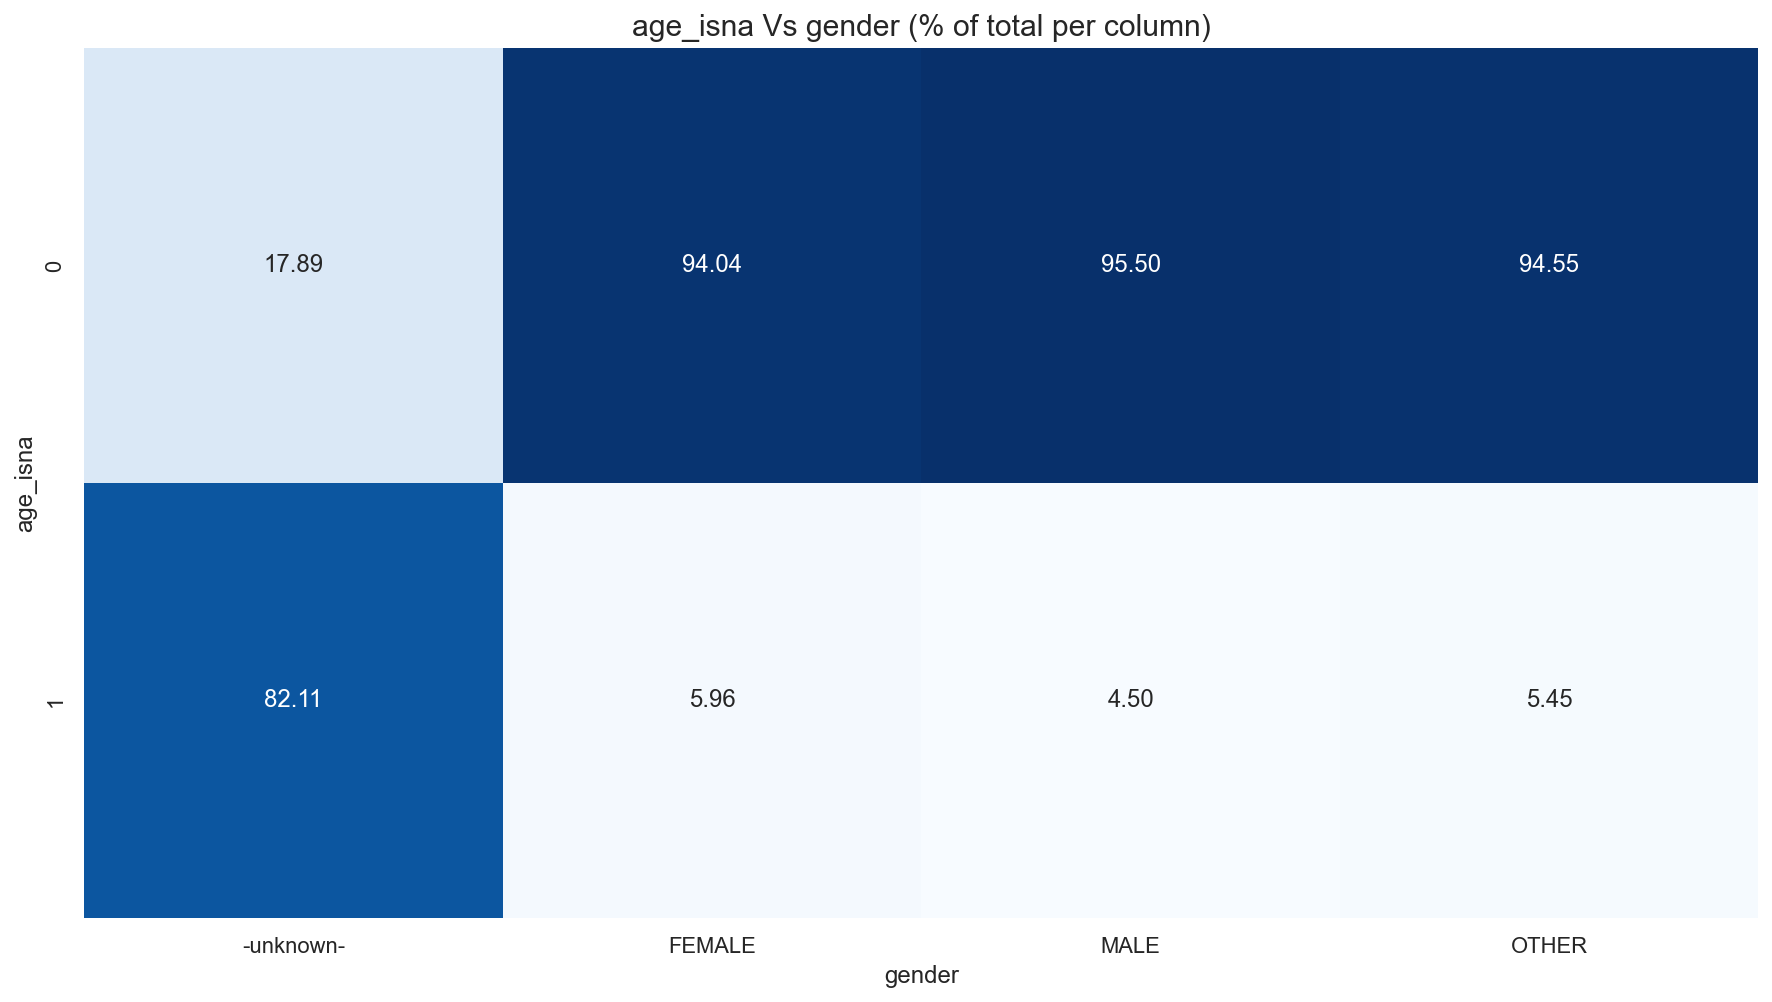

In [23]:
fig = plt.figure(figsize = (15,8))

ax = sns.heatmap(compare_columns(users_pps, 'id', 'age_isna', 'gender'),
                 annot=True, cmap="Blues", fmt='.2f', cbar=False)

ax.set_title('age_isna Vs gender (% of total per column)', size = 15)
plt.show()